In [373]:
import graph.generate_graph 
import task_allocation_layer.task_allocation 
import numpy as np

In [374]:
import imp
imp.reload(graph.generate_graph )
imp.reload(task_allocation_layer.task_allocation)

<module 'task_allocation_layer.task_allocation' from '/Users/luzy6/PycharmProjects/UAV_mission_assignment_and_path_planning/task_allocation_layer/task_allocation.py'>

In [375]:
#parameters
N_depots = 3
N_drones = 20
N_packages = 60
N_transit_edges = 20

In [376]:
# get a graph that randomly generate depot nodes, transit nodes and package nodes and cost_matrix
TG, depots_node, transit_node, packages_node, transit_edges, cost_matrix = graph.generate_graph.return_Digraph(N_depots, N_transit_edges, N_packages)

node


In [377]:
#update other parameters
total_nodes = len(TG.nodes)
N_transits = len(transit_node)

# we get transit node, package node and depot node, now we store the rest nodes are normal node
normal_node = np.array([])
for i in range(len(TG.nodes())):
    if i not in depots_node and i not in transit_node and i not in packages_node:
        normal_node = np.append(normal_node, i)
    

In [378]:
drone_tours = task_allocation_layer.task_allocation.task_allocation(total_nodes, N_depots, N_packages, N_drones, cost_matrix, depots_node, transit_node, packages_node, normal_node)

MCT
constraints for out-edges and in-edges for package
constranints for in-flow and out-flow from depots
1
make sure every depots in and out degree equal
all all constarints
A_eq.shape  (123, 675)
b_eq.shape  (120, 1) b_eq_constraint3.shape  (3, 1)
b_eq.shape  (123, 1)
start optimizer
     con: array([-2.13651319e-12, -2.13584705e-12, -2.13651319e-12, -2.13673523e-12,
       -2.13651319e-12, -2.13673523e-12, -2.13606910e-12, -2.13606910e-12,
       -2.13562501e-12, -2.13629114e-12, -2.13629114e-12, -2.13584705e-12,
       -2.13584705e-12, -2.13629114e-12, -2.13651319e-12, -2.13606910e-12,
       -2.13651319e-12, -2.13629114e-12, -2.13606910e-12, -2.13651319e-12,
       -2.13518092e-12, -2.13584705e-12, -2.13606910e-12, -2.13629114e-12,
       -2.13606910e-12, -2.13606910e-12, -2.13673523e-12, -2.13606910e-12,
       -2.13651319e-12, -2.13606910e-12, -2.13606910e-12, -2.13673523e-12,
       -2.13629114e-12, -2.13629114e-12, -2.13584705e-12, -2.13673523e-12,
       -2.13717932e-12, -2.13

/Users/luzy6/PycharmProjects/UAV_mission_assignment_and_path_planning/task_allocation_layer/task_allocation.py:128: OptimizeWarning: Sparse constraint matrix detected; setting 'sparse':True.
  res = linprog(c=cost_vector, A_ub=A_ub, b_ub=b_ub, A_eq=A_eq, b_eq=b_eq,
/Users/luzy6/miniforge3/envs/UAV/lib/python3.9/site-packages/scipy/optimize/_linprog_util.py:843: OptimizeWarning: A_eq does not appear to be of full row rank. To improve performance, check the problem formulation for redundant equality constraints.
  warn(redundancy_warning, OptimizeWarning, stacklevel=1)


In [379]:
import networkx as nx

In [380]:
from math import radians, cos, sin, asin, sqrt
 
def haversine(lon1, lat1, lon2, lat2): # 经度1，纬度1，经度2，纬度2 （十进制度数）
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # 将十进制度数转化为弧度
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
 
    # haversine公式
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # 地球平均半径，单位为公里
    return c * r * 1000

In [381]:
def dist(a, b, TG=TG):
    lat1 = TG.nodes[a]['lat']
    lon1 = TG.nodes[a]['lon']
    lat2 = TG.nodes[b]['lat']
    lon2 = TG.nodes[b]['lon']
#     print("node",a,lon1,lat1,"to node",b,lon2,lat2," liner distance:",haversine(lon1, lat1, lon2, lat2))
#     print(haversine(lon1, lat1, lon2, lat2))
#     print(lat1, lon1, lat2, lon2)
    return haversine(lon1, lat1, lon2, lat2)

In [382]:
# find each drones route
drone_routes = []
for i in range(len(drone_tours)):
    cur_route = [drone_tours[i][0]]
#     print("drone", i, "route:")
    for (node1, node2) in zip(drone_tours[i][:len(drone_tours[i])-1], drone_tours[i][1:]):
        cur_route.extend(nx.astar_path(TG, node1, node2, dist)[1:])
#         print(nx.astar_path(TG, node1, node2, dist))
    drone_routes.append(cur_route)

In [383]:
pos_location = {}
for i in TG.nodes:
    pos_location[i] = (TG.nodes[i]['lon'], TG.nodes[i]['lat'])
    

In [410]:
node_size = 1000
colo_map = {}
nod_size_map = {}
for i in transit_node:
    colo_map[i] = 'green'
    nod_size_map[i] = node_size
for i in packages_node:
    colo_map[i] = 'red'
    nod_size_map[i] = node_size
for i in depots_node:
    colo_map[i] = 'black'
    nod_size_map[i] = node_size
for i in normal_node:
    colo_map[i] = 'grey'
    nod_size_map[i] = 0
len(colo_map)
color_map = []
node_size_map = []
for i in range(len(colo_map)):
    color_map.append(colo_map[i])
    node_size_map.append(nod_size_map[i])

In [411]:
pos = nx.random_layout(TG)

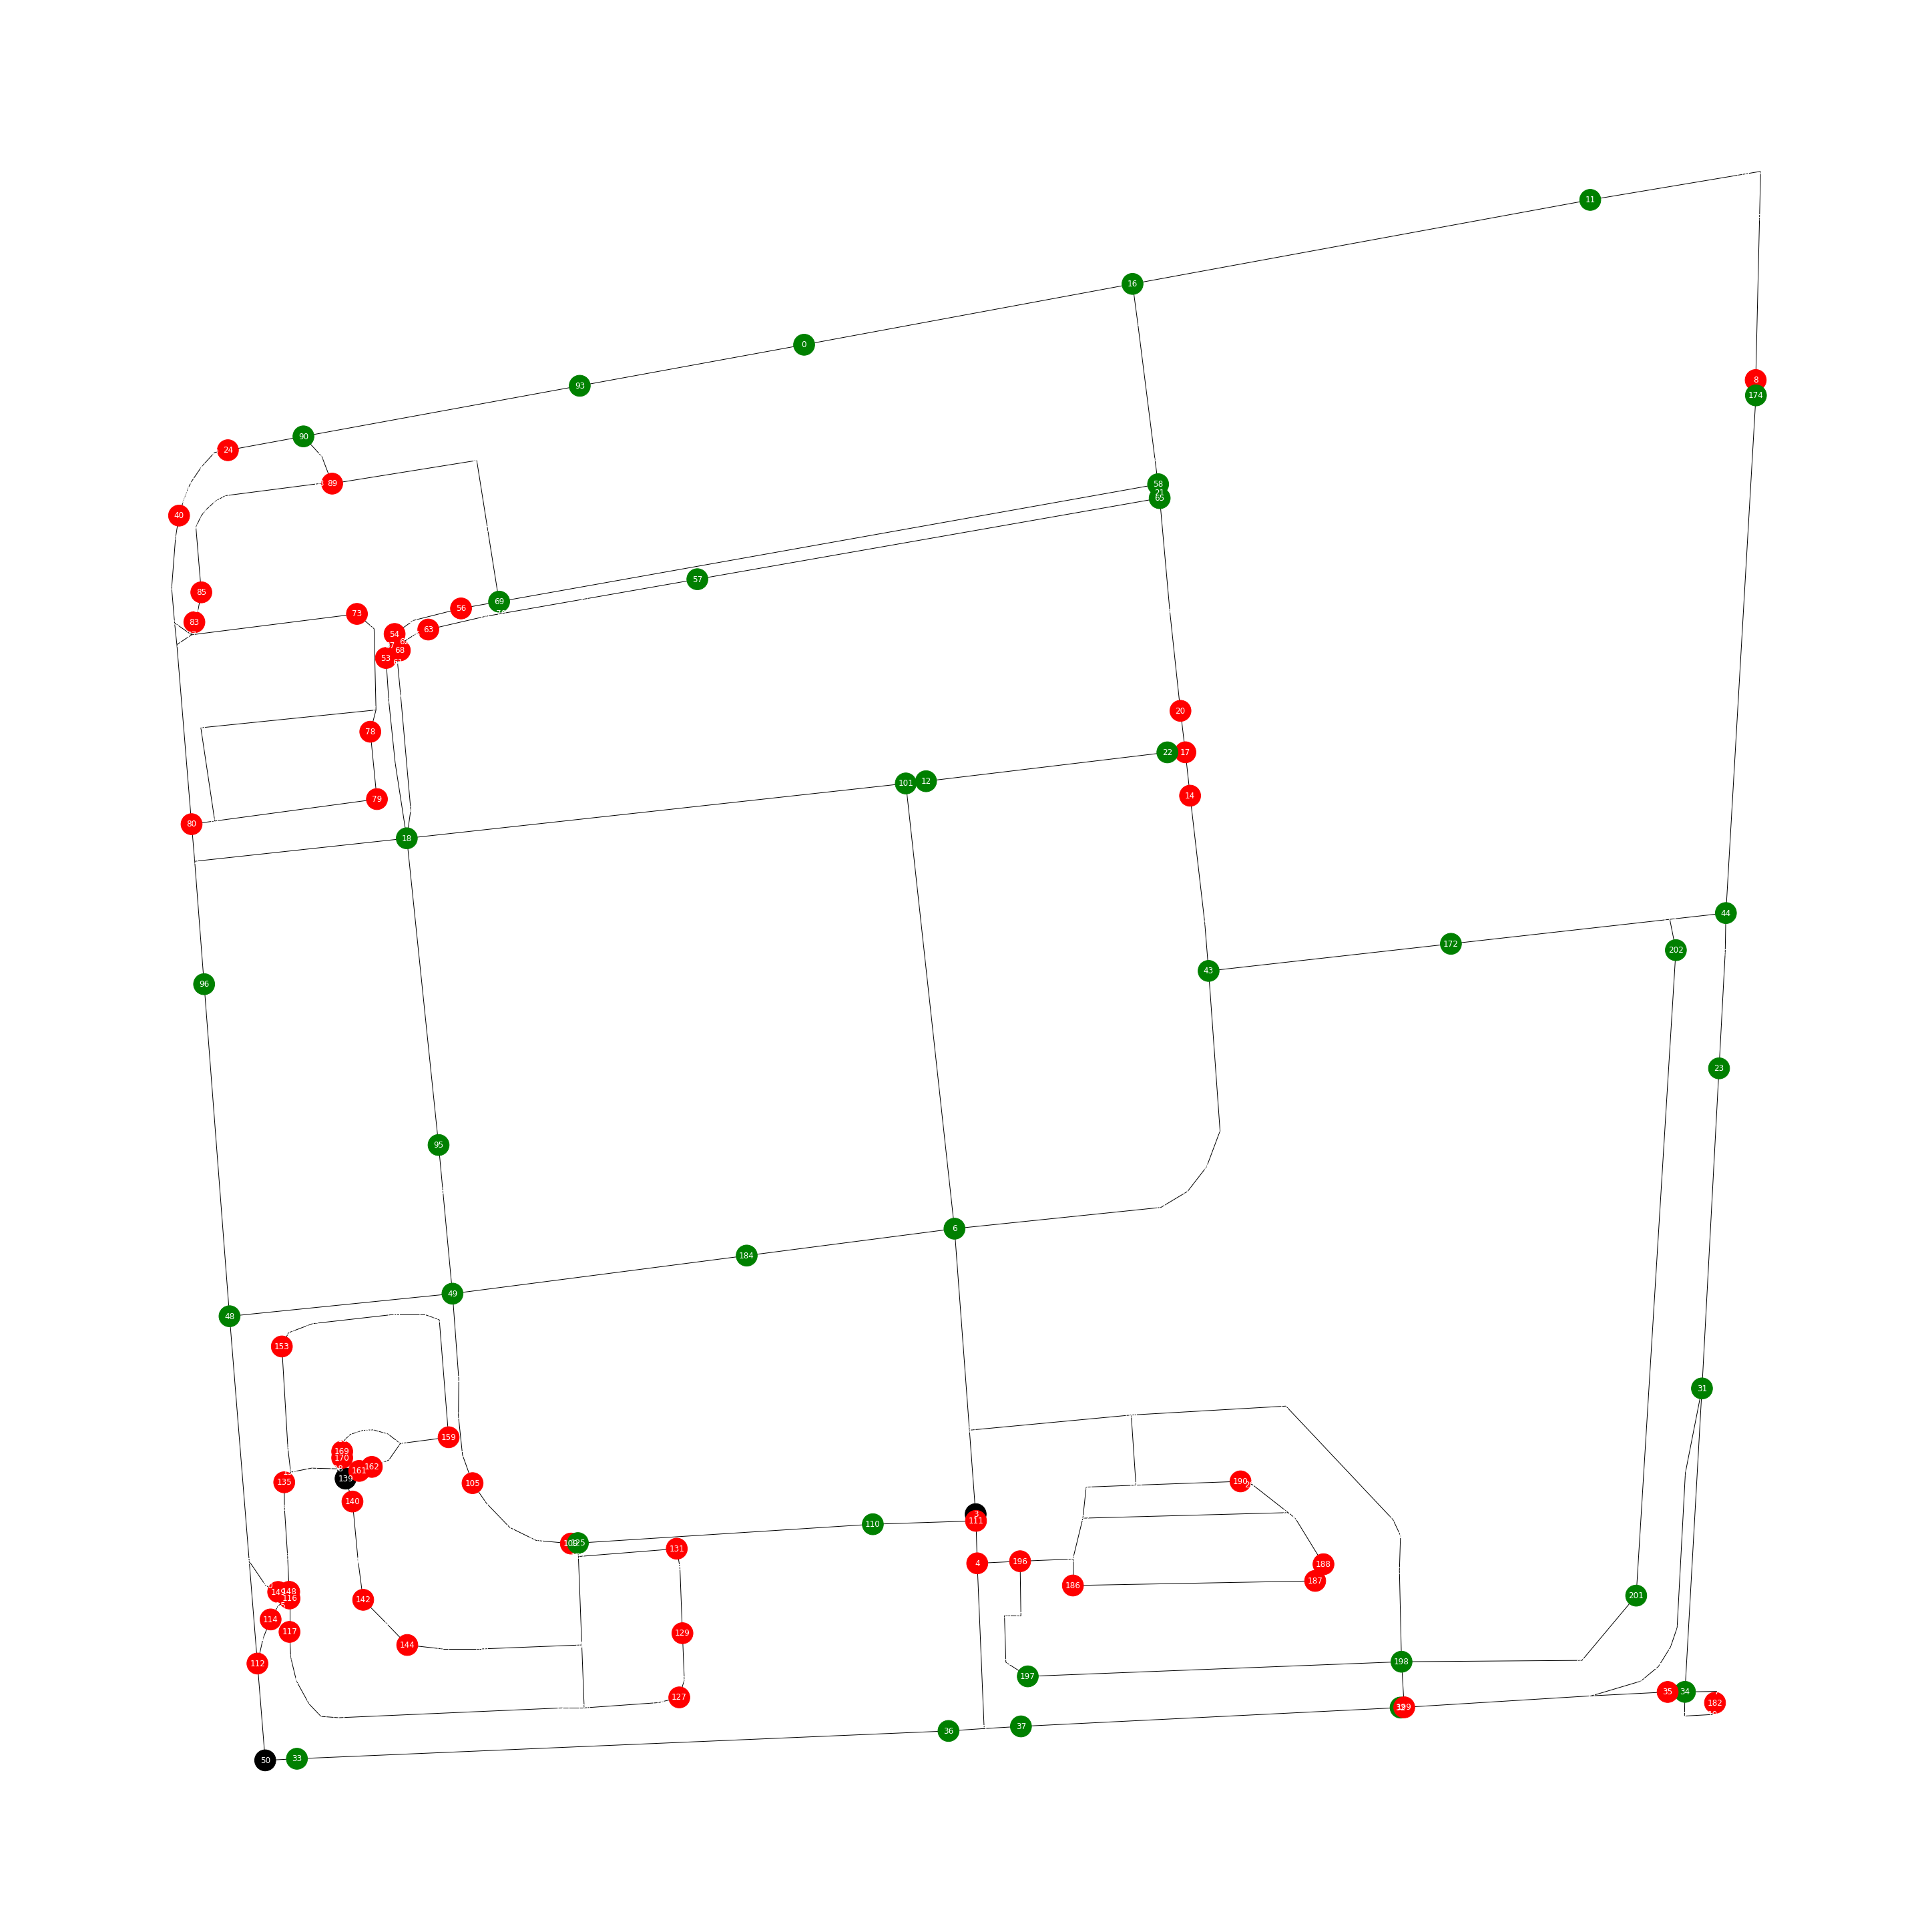

In [412]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (40, 40)  # 单位是inches
#green transit_node
#black depot_node
#red package node
#grey normal_node
nx.draw(TG, 
        pos=pos_location, 
        node_size=node_size_map, 
        cmap=plt.get_cmap('viridis'), 
        node_color=color_map, 
        width=1,
        with_labels=True, 
        font_color='white')

In [387]:
# # each drone total delivery cost
# delivery_cost = []
# for i in range(len(drone_routes)):
#     this_cost = 0
#     for j in range(0,len(drone_routes[i])-1):
#         # transit edge dose not consume the distance flown by the drone
#         if TG.nodes[drone_routes[i][j]]['type'] == 'transit' and TG.nodes[drone_routes[i][j+1]]['type'] == 'transit':
#             continue
#         this_cost += TG.edges[drone_routes[i][j], drone_routes[i][j+1]]['weight']
#     delivery_cost.append(this_cost)
# print(delivery_cost)

In [414]:
# we generate a new type graph
transit_network = nx.Graph()
# firstly, add transit nodes
for i in transit_node:
#     print(i)
    transit_network.add_node(i
                            , lon=TG.nodes[i]['lon']
                            , lat=TG.nodes[i]['lat']
                            , type='transit'
                            )
# then we add transit edges
for edge in transit_edges:
    transit_network.add_edge(edge[0], edge[1]
                             ,type='transit'
                             ,weight=0.0
                             )
# we add depots and packages
for i in packages_node:
    transit_network.add_node(i
                             , lon=TG.nodes[i]['lon']
                             , lat=TG.nodes[i]['lat']
                             , type='package'
                            )
for i in depots_node:
    transit_network.add_node(i
                             , lon=TG.nodes[i]['lon']
                             , lat=TG.nodes[i]['lat']
                             , type='depot'
                            )
# finally we add edge ?depot to depot?, depot to package and depot to transit and transit to package
for i in depots_node:
    for j in transit_node: # depot to transit
        transit_network.add_edge(i, j
                                 ,type='flight'
                                 ,weight=haversine(TG.nodes[i]['lon'], TG.nodes[i]['lat'], TG.nodes[j]['lon'], TG.nodes[j]['lat'])# directly distance
                                )
for t in transit_node:
    for p in packages_node:
        transit_network.add_edge(t, p
                                 ,type='flight'
                                 ,weight=haversine(TG.nodes[t]['lon'], TG.nodes[t]['lat'], TG.nodes[p]['lon'], TG.nodes[p]['lat'])# directly distance
                                )

In [415]:
transit_network.nodes

NodeView((0.0, 6.0, 11.0, 12.0, 16.0, 18.0, 22.0, 23.0, 31.0, 32.0, 33.0, 34.0, 36.0, 37.0, 43.0, 44.0, 48.0, 49.0, 57.0, 58.0, 65.0, 69.0, 90.0, 93.0, 95.0, 96.0, 101.0, 110.0, 125.0, 172.0, 174.0, 184.0, 197.0, 198.0, 201.0, 202.0, 117.0, 144.0, 127.0, 78.0, 80.0, 24.0, 161.0, 56.0, 89.0, 196.0, 159.0, 114.0, 182.0, 4.0, 187.0, 153.0, 54.0, 131.0, 68.0, 63.0, 85.0, 135.0, 162.0, 186.0, 190.0, 105.0, 140.0, 111.0, 148.0, 149.0, 83.0, 53.0, 20.0, 129.0, 35.0, 169.0, 79.0, 112.0, 142.0, 8.0, 188.0, 199.0, 73.0, 116.0, 14.0, 170.0, 40.0, 109.0, 17.0, 3.0, 50.0, 139.0))

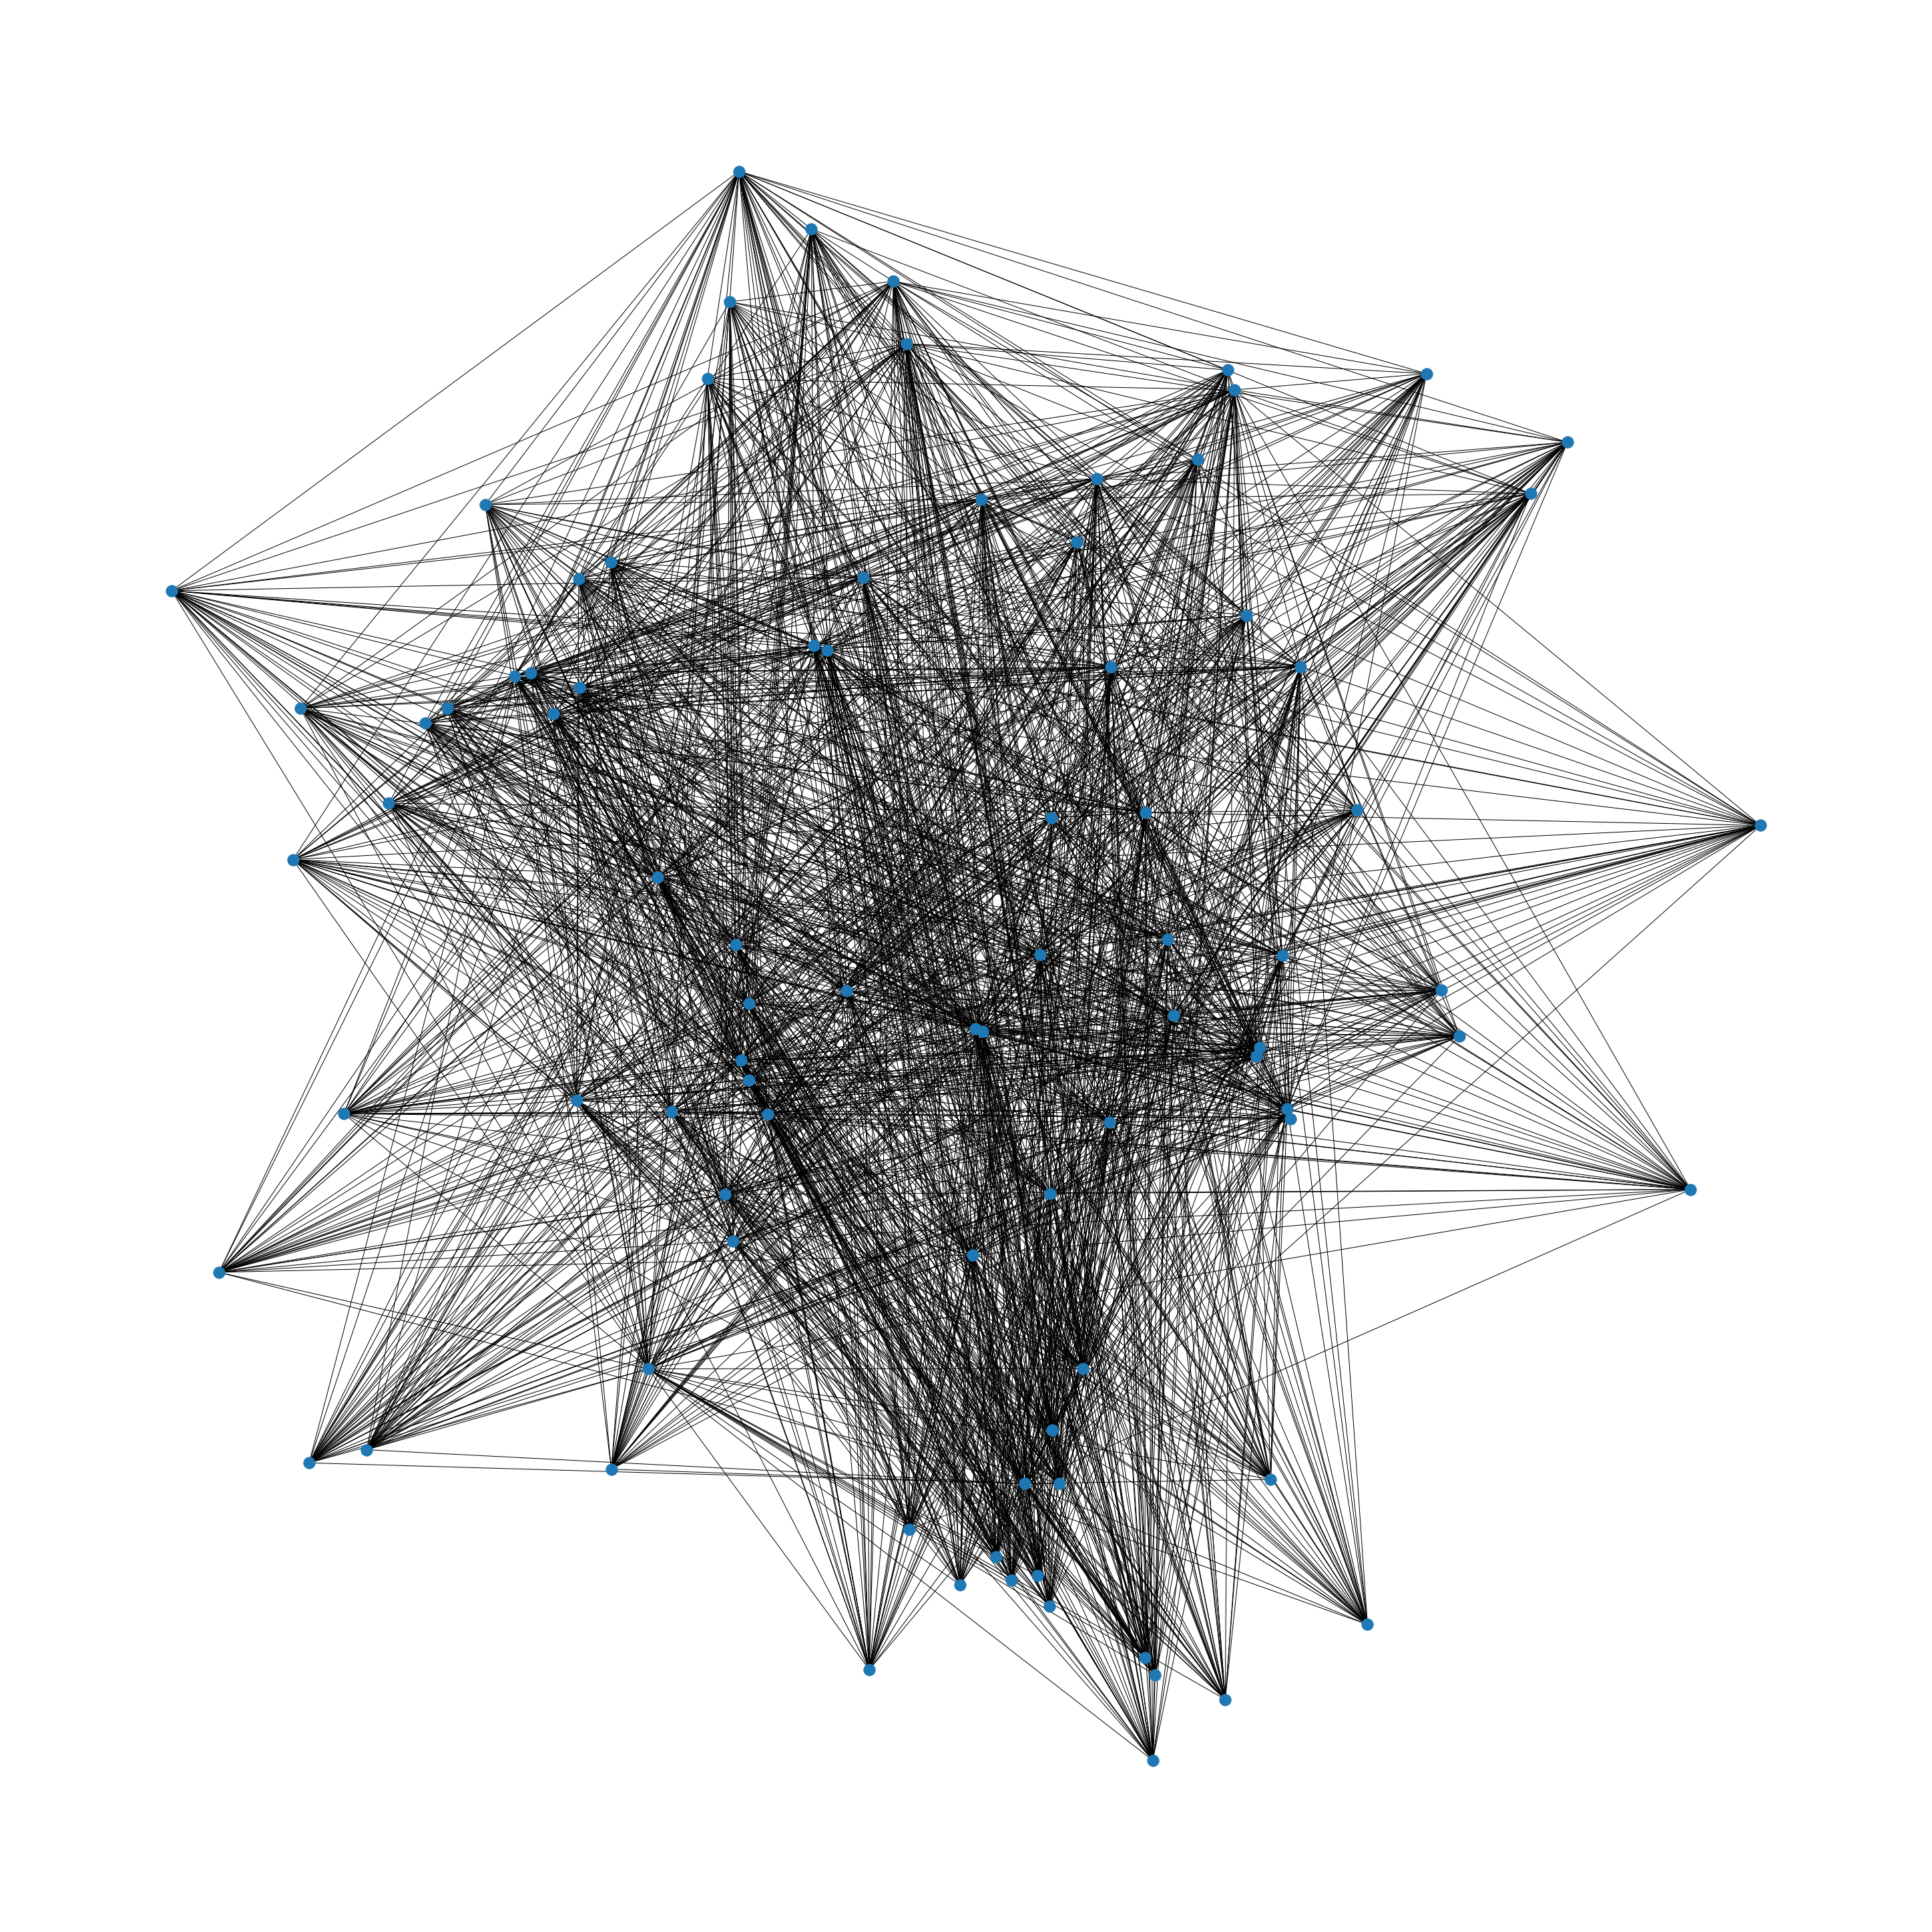

In [416]:
nx.draw(transit_network)

In [417]:
depots_node

array([  3.,  50., 139.])

In [418]:
packages_node

array([117., 144., 127.,  78.,  80.,  24., 161.,  56.,  89., 196., 159.,
       114., 182.,   4., 187., 153.,  54., 131.,  68., 127.,  63.,  85.,
       135., 162., 186., 190., 105., 140., 111., 186., 148.,  78., 149.,
       149.,  83.,  78.,  53.,  24.,  20., 111., 129.,  35., 169.,  79.,
       112., 142., 148.,   8., 188., 199.,  73., 116.,  14., 170.,  40.,
       109.,  89.,  17., 135., 117.])

In [419]:
nx.astar_path(transit_network, 50, 24, dist)

[50, 48.0, 96, 24.0]

In [406]:
drone_routes

[[3.0,
  111,
  4,
  111,
  3,
  195,
  6,
  47,
  212,
  46,
  45,
  43,
  172,
  173,
  44,
  174,
  8,
  174,
  44,
  173,
  172,
  43,
  45,
  46,
  212,
  47,
  6,
  195,
  3],
 [3.0,
  195,
  6,
  47,
  212,
  46,
  45,
  43,
  19,
  14,
  19,
  43,
  45,
  46,
  212,
  47,
  6,
  195,
  3,
  195,
  6,
  47,
  212,
  46,
  45,
  43,
  19,
  14,
  17,
  14,
  19,
  43,
  45,
  46,
  212,
  47,
  6,
  195,
  3],
 [3.0,
  195,
  6,
  47,
  212,
  46,
  45,
  43,
  19,
  14,
  17,
  20,
  17,
  14,
  19,
  43,
  45,
  46,
  212,
  47,
  6,
  195,
  3,
  111,
  4,
  5,
  37,
  32,
  199,
  27,
  35,
  27,
  199,
  32,
  37,
  5,
  4,
  111,
  3],
 [3.0,
  111,
  110,
  125,
  109,
  108,
  107,
  106,
  105,
  106,
  107,
  108,
  109,
  125,
  110,
  111,
  3,
  111,
  110,
  125,
  109,
  125,
  110,
  111,
  3,
  111,
  3,
  111,
  110,
  125,
  132,
  131,
  132,
  125,
  110,
  111,
  3,
  111,
  4,
  5,
  37,
  32,
  199,
  27,
  35,
  34,
  7,
  182,
  7,
  34,
  35,
  27,
  19

In [407]:
drone_tours

[[3.0, 4.0, 3.0, 8.0, 3.0],
 [3.0, 14.0, 3.0, 17.0, 3.0],
 [3.0, 20.0, 3.0, 35.0, 3.0],
 [3.0, 105.0, 3.0, 109.0, 3.0, 111.0, 3.0, 131.0, 3.0, 182.0, 3.0],
 [3.0, 186.0, 3.0, 187.0, 3.0, 188.0, 3.0, 190.0, 3.0, 196.0, 3.0, 199.0, 3.0],
 [50.0, 24.0, 50.0],
 [50.0, 40.0, 50.0, 53.0, 50.0],
 [50.0, 54.0, 50.0, 56.0, 50.0],
 [50.0, 63.0, 50.0, 68.0, 50.0],
 [50.0, 73.0, 50.0, 78.0, 50.0],
 [50.0, 79.0, 50.0, 80.0, 50.0],
 [50.0, 83.0, 50.0, 85.0, 50.0],
 [50.0, 89.0, 50.0, 112.0, 50.0, 114.0, 50.0],
 [50.0,
  116.0,
  50.0,
  117.0,
  50.0,
  148.0,
  50.0,
  149.0,
  50.0,
  139.0,
  127.0,
  139.0,
  129.0,
  139.0],
 [139.0,
  135.0,
  139.0,
  140.0,
  139.0,
  142.0,
  139.0,
  144.0,
  139.0,
  153.0,
  139.0,
  159.0,
  139.0,
  161.0,
  139.0,
  162.0,
  139.0,
  169.0,
  139.0,
  170.0,
  139.0]]